<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [5]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
# Read the CSV file to a data frame and generate statistical description of the data set
import pandas as pd

# 1. Import data set from CSV file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
data = pd.read_csv('dataset.csv')

# 2. Generate statistical description of all features
description = data.describe(include='all')
print(description)

        Unnamed: 0.1  Unnamed: 0 Manufacturer    Category         GPU  \
count     238.000000  238.000000          238  238.000000  238.000000   
unique           NaN         NaN           11         NaN         NaN   
top              NaN         NaN         Dell         NaN         NaN   
freq             NaN         NaN           71         NaN         NaN   
mean      118.500000  118.500000          NaN    3.205882    2.151261   
std        68.848868   68.848868          NaN    0.776533    0.638282   
min         0.000000    0.000000          NaN    1.000000    1.000000   
25%        59.250000   59.250000          NaN    3.000000    2.000000   
50%       118.500000  118.500000          NaN    3.000000    2.000000   
75%       177.750000  177.750000          NaN    4.000000    3.000000   
max       237.000000  237.000000          NaN    5.000000    3.000000   

                OS    CPU_core  Screen_Size_inch  CPU_frequency      RAM_GB  \
count   238.000000  238.000000        238.00

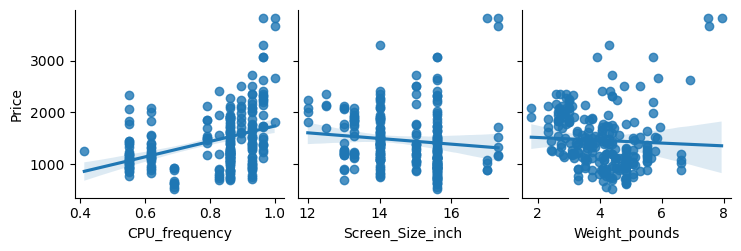

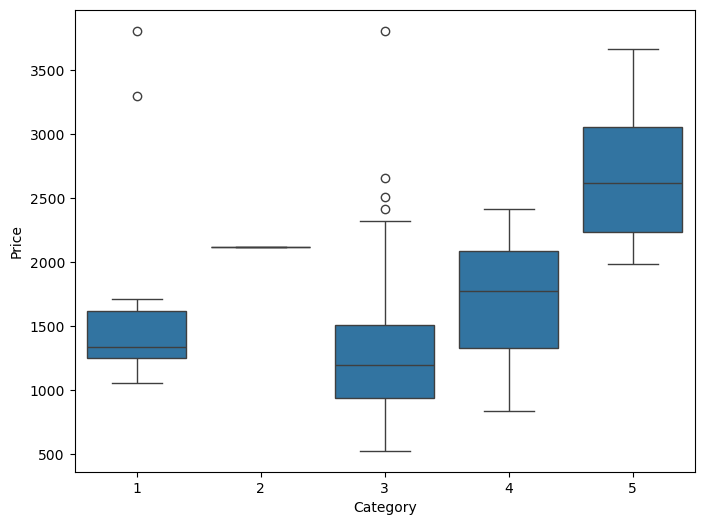

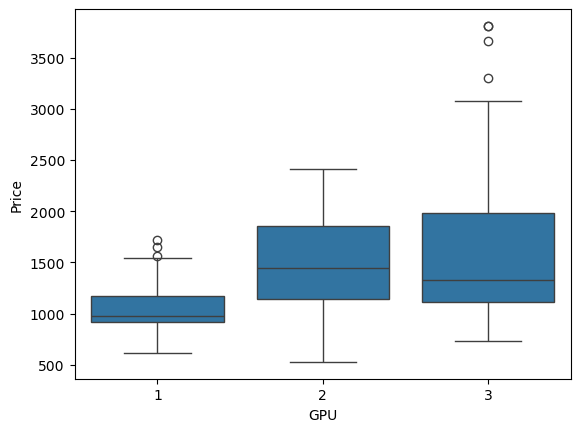

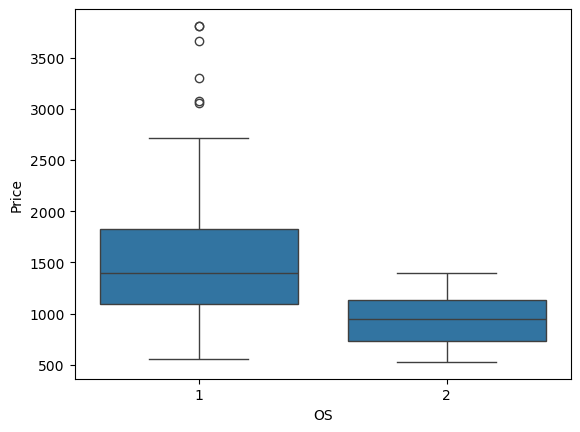

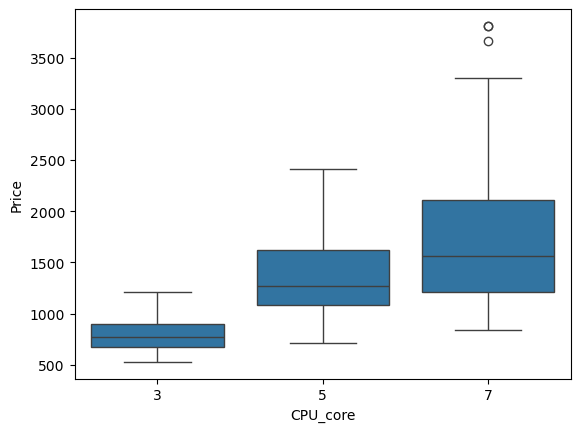

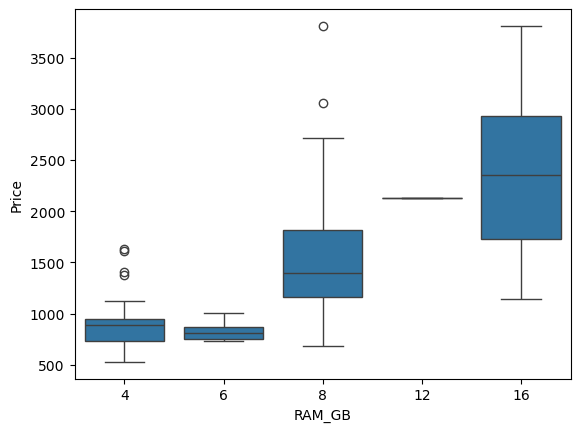

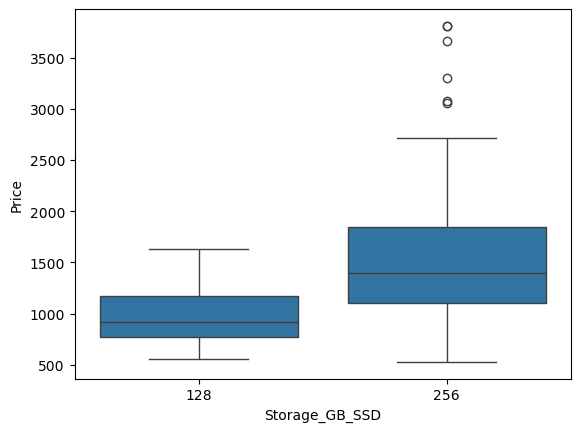

In [6]:
# Create parameter visualizations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data set from CSV file
data = pd.read_csv('dataset.csv')

# Create regression plots for CPU_frequency, Screen_Size_inch, and Weight_pounds against Price
sns.pairplot(data, x_vars=['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds'], y_vars=['Price'], kind='reg')
plt.show()

# Create box plots for Category, GPU, OS, CPU_core, RAM_GB, and Storage_GB_SSD against Price
categorical_vars = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
plt.figure(figsize=(8, 6))
for var in categorical_vars:
    sns.boxplot(x=var, y='Price', data=data)
    plt.show()

In [7]:
# Evaluate dependence
import pandas as pd
import numpy as np
import scipy.stats as stats

# Import data set from CSV file
data = pd.read_csv('dataset.csv')

# Get numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Create lists to store correlation values, Pearson coefficients, and p-values
attributes = []
correlations = []
pearson_coeffs = []
p_values = []

# Iterate over numerical columns
for col in numerical_cols:
    if col != 'Price':  # Exclude target variable against itself
        correlation = data['Price'].corr(data[col])
        pearson_coef, p_value = stats.pearsonr(data[col], data['Price'])
        attributes.append(col)
        correlations.append(correlation)
        pearson_coeffs.append(pearson_coef)
        p_values.append(p_value)

# Create a DataFrame with the results
correlation_df = pd.DataFrame({'Attribute': attributes, 'Correlation': correlations, 'Pearson Coefficient': pearson_coeffs, 'P-value': p_values})
print(correlation_df)

           Attribute  Correlation  Pearson Coefficient       P-value
0       Unnamed: 0.1     0.321933             0.321933  3.851058e-07
1         Unnamed: 0     0.321933             0.321933  3.851058e-07
2           Category     0.286243             0.286243  7.225696e-06
3                GPU     0.288298             0.288298  6.166950e-06
4                 OS    -0.221730            -0.221730  5.696643e-04
5           CPU_core     0.459398             0.459398  7.912950e-14
6   Screen_Size_inch    -0.110644            -0.110644  8.853398e-02
7      CPU_frequency     0.366666             0.366666  5.502463e-09
8             RAM_GB     0.549297             0.549297  3.681561e-20
9     Storage_GB_SSD     0.243421             0.243421  1.489892e-04
10     Weight_pounds    -0.050312            -0.050312  4.397694e-01
11    Screen-Full_HD    -0.021075            -0.021075  7.463568e-01
12  Screen-IPS_panel     0.021075             0.021075  7.463568e-01


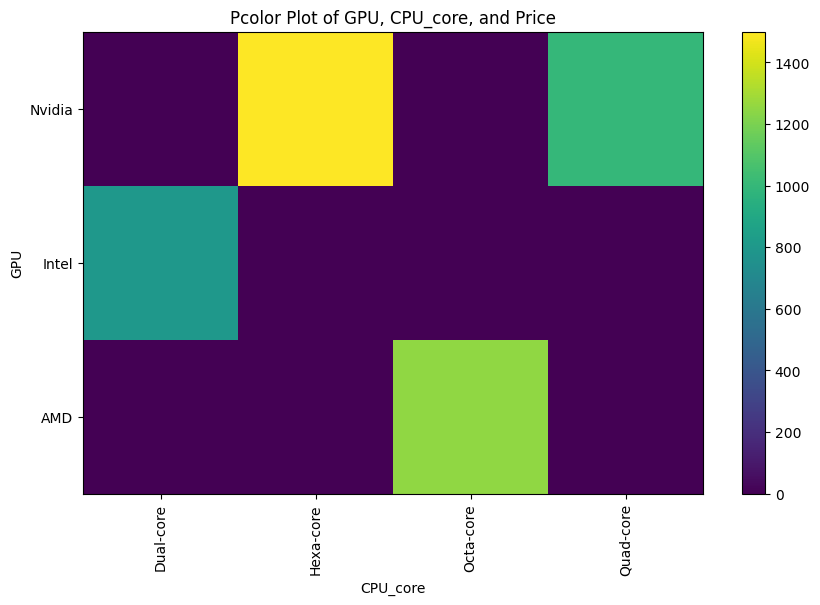

In [9]:
# Group the different variables to create a pivot table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'GPU': ['Nvidia', 'AMD', 'Intel', 'Nvidia', 'AMD'],
    'CPU_core': ['Quad-core', 'Octa-core', 'Dual-core', 'Hexa-core', 'Octa-core'],
    'Price': [1000, 1200, 800, 1500, 1300]
}

df = pd.DataFrame(data)

# Create a pivot table for GPU, CPU_core, and Price grouped by Price
pivot_table = df.pivot_table(index='GPU', columns='CPU_core', values='Price', aggfunc='mean', fill_value=0)

# Plot a pcolor plot for the pivot table
plt.figure(figsize=(10, 6))
plt.pcolor(pivot_table, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), pivot_table.columns, rotation='vertical')
plt.yticks(np.arange(0.5, len(pivot_table.index), 1), pivot_table.index)
plt.xlabel('CPU_core')
plt.ylabel('GPU')
plt.title('Pcolor Plot of GPU, CPU_core, and Price')
plt.show()

## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
